# Definite Integrals, Part 1: The Building Blocks

**References:**

- Sections 5.2.1 and 5.2.4 of Chapter 5 *Numerical Differentiation and Integration* in {cite}`Sauer`.
- Sections 4.3 *Elmenets of Numerical Integration* of {cite}`Burden-Faires`.

## Introduction

The objective of this and several subsequent sections is to develop methods for approxmating a definite integral

$$ I = \int_a^b f(x) \; dx $$

This is arguably even more important than approximating derivatives, for several reasons;
in particular, because there are many functions for which antiderivative formulas cannot be found,
so that the result of the Fundamental Theorem of Calculus, that

$$ \int_a^b f(x) \; dx = F(b) - F(a), \text{ for } F \text{ any antiderivative of } f$$

does not help us.

One core idea is to approximate the function $f$ by a polynomial (or several), and use its integral as an approximation.
The two simplest possibilities here are approximating by a constant and by a straight line;
here we explore the latter; the former will be visited soon.

In [7]:
using PyPlot

## Approximating with a single linear function: the Trapezoid Rule

The idea is to approximate $f:[a, b] \to \Bbb{R}$ by collocation at the end points of this interval:

$$ f(x) \approx L(x) := \frac{f(a)(b-x) + f(b)(x-a)}{b-a}, = f_{ave} (b-a) $$

Then the approximation — which will be called $T_1$, for reasons that will becom clear soon — is

$$I \approx T_1 = \int_a^b L(x) dx = \frac{f(a) + f(b)}{2} (b-a) $$

This can be interpreted as replacing $f(x)$ by $f_{ave}$ the average of the value at the end points,
and inegrting that simple function.

For the example $f(x) = e^x$ on $[-1, 3]$

In [8]:
a = 1.0
b = 3.0
f(x) = exp(x);

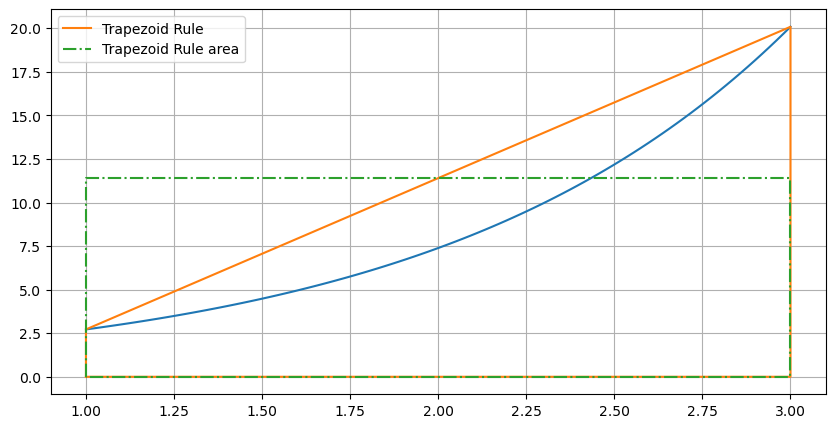

In [9]:
f_average = (f(a) + f(b))/2
x = range(a, b, 100)
figure(figsize=[10,5])
plot(x, f.(x))
plot([a, a, b, b, a], [0, f(a), f(b), 0, 0], label="Trapezoid Rule")
plot([a, a, b, b, a], [0, f_average, f_average, 0, 0], "-.", label="Trapezoid Rule area")
legend()
grid(true)

The approximation $T_1$ is the area of the orange trapezoid (hence the name!) which is also the area of the green rectangle.

## Approximating with a constant: the Midpoint Rule

The idea here is to approximate $f:[a, b] \to \Bbb{R}$ by its value at the midpoint of the interval,
like the building blocks in a Riemann sum with the middel being the intuitive best choice of where to put the rectangle.

$$ f(x) \approx f_{mid} := f \left(\frac{a+b}{2}\right) $$

Then the approximation — which will be called $M_1$ — is

$$ I \approx M_1 = \int_a^b f_{mid} \, dx =  f \left(\frac{a+b}{2}\right)(b-a) $$

For the same example $f(x) = e^x$ on $[-1, 3]$

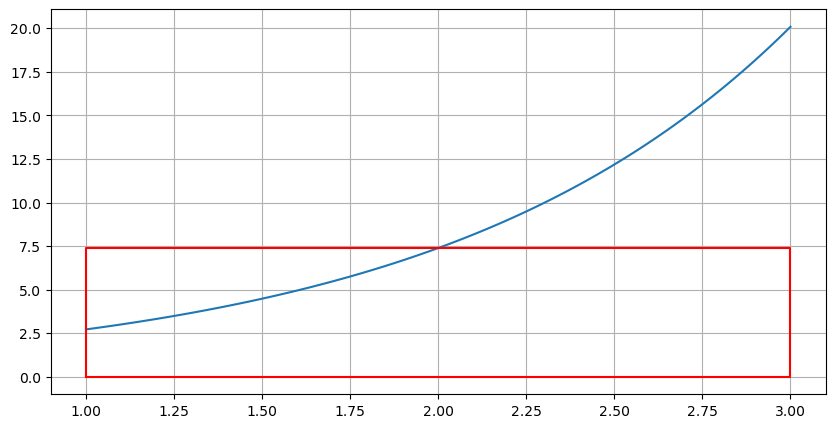

In [10]:
f_midpoint = f((a+b)/2)
figure(figsize=[10,5])
plot(x, f.(x))
plot([a, a, b, b, a], [0, f_midpoint, f_midpoint, 0, 0], "r", label="Midpoint Rule")
grid(true)

The approximation $M_1$ is the area of the red rectangle.

The two methods can be compared my combining these graphs:

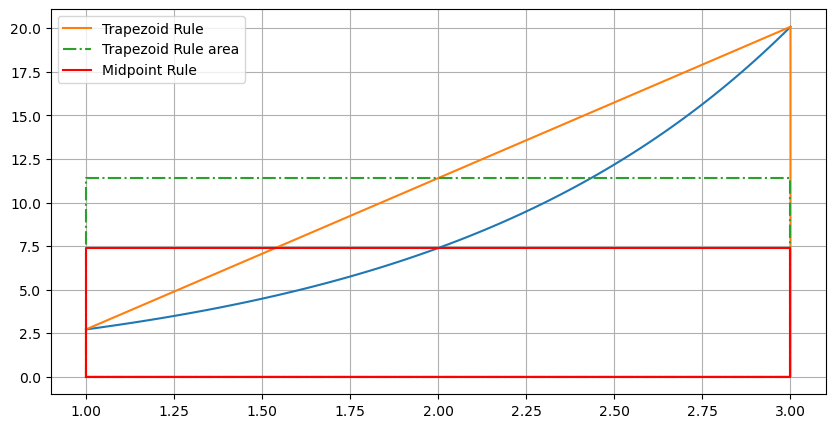

In [11]:
f_midpoint = f((a+b)/2)
figure(figsize=[10,5])
plot(x, f.(x))
plot([a, a, b, b, a], [0, f(a), f(b), 0, 0], label="Trapezoid Rule")
plot([a, a, b, b, a], [0, f_average, f_average, 0, 0], "-.", label="Trapezoid Rule area")
plot([a, a, b, b, a], [0, f_midpoint, f_midpoint, 0, 0], "r", label="Midpoint Rule")
legend()
grid(true)

## Error Formulas

These graphs indicate that the trapezoid rule will over-estimate the error for this and any function that is convex up on the interval $[a, b]$.
With closer examination it can perhaps be seen that the Midpoint Rule will instead underestimate in this situation, because
its "overshoot" at left is less than its "undershoot" at right.

We can derive error formulas that confirm this, and which are the basis for both practical error estimates and for deriving more accurate approximation methods.

The first such method will be to use multiple small intervals instead of a single bigger one (using piecewise polynomial approximation) and for that, it is convenient to define $h = b-a$ which will become the parameter that we reduce in order to improve accuracy.

```{prf:theorem} Error in the Trapezoid Rule, $T_1$
:label: trapezoid-rule-error

For a function $f$ that is twice differentiable on interval $[a, b]$, the error in the Trapezoid Rule is

$$ \int_a^b f(x) dx - T_1 = -\frac{(b-a)^3}{12}f''(\xi) \quad \text{for some} \; \xi \in [a, b] $$

It will be convenient to define $h := b-a$ so that this becomes

$$ \int_a^b f(x) dx - T_1 = -\frac{h^3}{12}f''(\xi) \quad \text{for some} \; \xi \in [a, b]. $$
```

```{prf:theorem} Error in the Midpoint Rule, $M_1$
:label: midpoint-rule-error

For a function $f$ that is twice differentiable on interval $[a, b]$ and again with $h=b-a$,
the error in the Midpoint Rule is

$$ \int_a^b f(x) dx - M_1 = \frac{h^3}{24}f''(\xi) \quad \text{for some} \; \xi \in [a, b] $$
```

These will be verified below, using the error formulas for Taylor polynomials and collocation polynomials.

For now, note that:
- The results confirm that for a function that is convex up, the Trapezoid Rule overestimates and the Midpoint Rule underestimates.
- The ratio of the errors is approximately $-2$. This will be used to get a better result by using a weighted average: *Simpson's Rule.*
- The errors are $O(h^3)$. This opens the door to Richardson Extrapolation, as will be seen soon in the method of *Romberg Integration.*

### Proofs of these error results

One side benefit of the following verifications is that they also offer illustrations of how the two fundamental error formulas help us: Taylor's Formula and its cousin the error formula for polynomial collocation.

To help prove the above formulas, we introduce a result that also helps in various places later:

```{prf:theorem} The Integral Mean Value Theorem
:label: integral-mean-value-theorem

In an integral

$$ \int_a^b f(x) w(x) \, dx  $$

with $f$ continuous and the "weight function" $w(x)$ positive valued
(actually, it is enough that $w(x) \geq 0$ and it is not zero everyhere),
there is a point $\xi \in [a,b]$ that gives a "weighted average value" for $f(x)$ in the sense that

$$ \int_a^b f(x) w(x) \, dx = \int_a^b f(\xi) w(x) \, dx, = f(\xi) \int_a^b w(x) \, dx $$
```

```{prf:proof} 

As $f$ is continuous on the closed, bounded interval $[a, b]$, the **Extreme Value Theorem** from calculus says that $f$ has a minimum $L$ and a maximum $H$ on this interval: $L \leq f(x) \leq H$.
Since $w(x) \geq 0$, this gives

$$ L w(x) \leq f(x) w(x) \leq H w(x) $$

and by integrating,

$$ L \int_a^b w(x) \,dx \leq \int_a^b f(x) w(x) \,dx \leq H \int_a^b w(x) \,dx $$

Dividing by $\int_a^b w(x) \,dx$ (which is positive),

$$ L \leq \frac{\int_a^b f(x) w(x) \,dx}{\int_a^b w(x) \,dx} \leq H $$

and the Mean Value Theorem says that $f$ attains this value for some $\xi \in [L, H]$:

$$ f(\xi) = \frac{\int_a^b f(x) w(x) \,dx}{\int_a^b w(x) \,dx} $$ (integral-mean-value-formula)

Clearing the denominator gives the claimed result.
```

```{prf:proof}
(of {prf:ref}`trapezoid-rule-error`, {prf:ref}`the trapezoid rule error formula) <trapezoid-rule-error>`

The function integrated to get the Trapezoid Rule is the linear collocating polynomial $L(x)$,
and from the section {doc}`polynomial-collocation-error-formulas`, we have

$$ f(x) - L(x) = \frac{f''(\xi_x)}{2}(x-a)(x-b) $$

Integrating each side gives

$$
\int_a^b (f(x) - L(x))
= I - T_1
= \int_a^b \frac{f''(\xi_x)}{2}(x-a)(x-b) \, dx
$$

To get around the complication that $\xi_x$ depends on $x$ in an unknown way, use the Ingtgral Measn Vlaue Theorem with weight function
$w(x) = (x-a)(b-x), \geq 0$ for $a \leq x \leq b$.
Then with $-f''$ as the function $f$ in {eq}`integral-mean-value-formula`:

$$ I - T_1 = - \int_a^b \frac{f''(\xi_x)}{2}(x-a)(b-x) \, dx
= - \frac{f''(\xi)}{2} \int_a^b (x-a)(b-x) \, dx $$

A bit of calculus gives $\displaystyle \int_a^b (x-a)(b-x) \, dx = \frac{(b-a)^3}{6}$, so

$$ I - T_1  = -\frac{f''(\xi)}{2} \frac{(b-a)^3}{6} = -\frac{f''(\xi)}{12} (b-a)^3 = -\frac{f''(\xi)}{12} h^3, $$

as advertised.
```

```{prf:proof}
(of {prf:ref}`midpoint-rule-error`, {prf:ref}`the midpoint rule error formula) <midpoint-rule-error>`

For this, we can use Taylor's Theorem for the linear approximation

$$ f(x) = f(c) + f'(c)(x-c) + \frac{f''(\xi_x)}{2}(x-c)^2 $$

with $c = (a+b)/2$, the midpoint. That is,

$$ f(x) - f(c) = f'(c) (x-c) + \frac{f''(\xi_x)}{2} (x-c)^2 $$

and integrating each side gives

$$
\int_a^b f(x) -  f(c) \, dx
= I - M_1
= \int_a^b \left[ f'(c)(x-c) + \frac{f''(\xi_x)}{2}(x-c)^2 \right] dx
$$

Here symmetry helps, by eliminating the first (potentialy biggest) term in the error:
we use the fact that $a = c - h/2$ and $b = c + h/2$

$$ \int_a^b f'(c)(x-c) \, dx = f'(c) \int_{c-h/2}^{c + h/2} x-c \, dx = \left[ (x-c)^2/2 \right]_{c-h/2}^{c + h/2} = (h/2)^2 - (h/2)^2 = 0 $$

Thus the error simplifies to

$$ I - M_1 = \int_a^b \frac{f''(\xi_x)}{2}(x-c)^2 \, dx $$

and much as above, the Integral Mean Value Theorem can be used, this time with weight function $w(x) = (x-c)^2, \geq 0$:

$$ I - M_1 = \frac{f''(\xi)}{2} \int_a^b (x-c)^2 \, dx $$

Another caluclus exercise:
$\displaystyle \int_a^b (x-c)^2 dx = \int_{-h/2}^{h/2} x^2 dx = \left[x^3/3\right]_{-h/2}^{h/2} = h^3/12$,
so indeed,

$$ I - M_1 = \frac{f''(\xi)}{24} h^3 $$
```

(left-endpoint-rule)=
## Appendix: Approximating a Definite Integral With the Left-hand Endpoint Rule

An even simpler approximation of $\int_a^b f(x)\, dx$ is the *Left-hand Endpoint Rule*,
probably seen in a calculus course.
For a single interval, this uses the approximation

$$ f(x) \approx f(a) $$

leading to

$$I := \int_a^b f(x)\, dx \approx L_1 :=  \int_a^b f(a) \, dx = f(a) (b-a) $$

The correpsonding composite rule with $n$ sub-intervals of equal width $h = (b-a)/n$ is

$$L_n = \sum_{i=0}^{n-1} f(x_i) h, \; = \sum_{i=0}^{n-1} f(a + i h) h$$

with $x_i = a + i h$ as before.

```{prf:theorem} Error in the Left-hand Endpoint Rule, $L_1$
:label: error-left-endpoint-rule

For a function $f$ that is differentiable on interval $[a, b]$, the error in the Left-hand Endpoint Rule is

$$ \int_a^b f(x) dx - L_1 = \frac{(b-a)^2}{2}f'(\xi), = \frac{h^2}{2}f'(\xi) \quad \text{for some} \; \xi \in [a, b]n$$
```

```{prf:proof}

This time use Taylor's Theorem just for the constant approximation with center $a$:

$$ f(x) = f(c) + f'(\xi_x)(x-a) $$

That is,

$$ f(x) - f(a) = f'(\xi_x)(x-a)$$

so integrating each side gives

$$
\int_a^b f(x) -  f(a) \, dx
= I - L_1
= \int_a^b  f'(\xi_x)(x-a) dx
$$

Using the Integral Mean Value Theorem again, now with weight $w(x) = x-a$ gives

$$ \int_a^b f'(\xi_x)(x-a) dx = f'(\xi) \int_a^b (x-a) dx = f'(\xi) \frac{(b-a)^2}{2} = \frac{h^2}{2} f'(\xi) \; \text{for some} \; \xi \in [a, b] $$

and inserting this into the previous formula gives the result.
```